In [431]:
import pandas as pd

In [433]:
df = pd.read_csv('synthetic_internet_to_bs_latency_dataset.csv')

In [435]:
df.head()

,timestamp,packet_type,protocol,qos_class,access_type,backhaul_type,path_hops,size_bytes,throughput_mbps,base_rtt_ms,jitter_ms,congestion_level_0to1,loss_rate_percent,queue_delay_ms,processing_delay_ms,tx_delay_ms,retransmission_penalty_ms,final_one_way_time_ms
0,2025-08-13T08:53:49.581558,video_chunk,TCP,video,Fiber,fiber,12,1942743,451.124530,10.986585,1.113226,0.417373,0.162603,13.936047,0.924105,34.451560,0.900293,56.818524
1,2025-08-13T08:53:49.581836,gaming_udp,UDP,ultra_reliable_low_latency,4G,fiber,19,109,50.638254,29.170225,4.561498,0.670438,1.773309,8.989746,0.656070,0.017220,4.739394,33.549040
2,2025-08-13T08:53:49.582091,web_small_obj,TCP,best_effort,5G,mmwave,10,3267,339.335317,18.071048,1.177563,0.267142,0.062391,7.136508,0.539916,0.077021,0.285216,18.251748
3,2025-08-13T08:53:49.582317,video_chunk,TCP,video,FixedWireless,mmwave,15,2120928,67.743237,21.469500,3.243235,0.570844,1.256795,26.069000,1.669331,250.466684,10.474843,302.657841
4,2025-08-13T08:53:49.582497,file_transfer_tcp,TCP,best_effort,5G,mmwave,15,23373627,368.820848,8.768864,0.327549,0.619678,0.169347,38.400072,2.270204,506.991448,0.945285,553.318990


In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   timestamp                  1500 non-null   object 
 1   packet_type                1500 non-null   object 
 2   protocol                   1500 non-null   object 
 3   qos_class                  1500 non-null   object 
 4   access_type                1500 non-null   object 
 5   backhaul_type              1500 non-null   object 
 6   path_hops                  1500 non-null   int64  
 7   size_bytes                 1500 non-null   int64  
 8   throughput_mbps            1500 non-null   float64
 9   base_rtt_ms                1500 non-null   float64
 10  jitter_ms                  1500 non-null   float64
 11  congestion_level_0to1      1500 non-null   float64
 12  loss_rate_percent          1500 non-null   float64
 13  queue_delay_ms             1500 non-null   float

In [437]:
df.isnull().sum()

timestamp                    0
packet_type                  0
protocol                     0
qos_class                    0
access_type                  0
backhaul_type                0
path_hops                    0
size_bytes                   0
throughput_mbps              0
base_rtt_ms                  0
jitter_ms                    0
congestion_level_0to1        0
loss_rate_percent            0
queue_delay_ms               0
processing_delay_ms          0
tx_delay_ms                  0
retransmission_penalty_ms    0
final_one_way_time_ms        0
dtype: int64

## PREPROCESSING THE DATA

In [439]:
original_label = {k: i for i,k in enumerate(df['packet_type'].unique(),0)}

In [442]:
original_label

{'video_chunk': 0,
 'gaming_udp': 1,
 'web_small_obj': 2,
 'file_transfer_tcp': 3,
 'iot_mqtt': 4,
 'web_large_obj': 5,
 'voip_rtp': 6,
 'dns_query': 7,
 'control_syn_ack': 8}

In [444]:
df['packet_type']=df['packet_type'].map(original_label)

In [446]:
df.head()

,timestamp,packet_type,protocol,qos_class,access_type,backhaul_type,path_hops,size_bytes,throughput_mbps,base_rtt_ms,jitter_ms,congestion_level_0to1,loss_rate_percent,queue_delay_ms,processing_delay_ms,tx_delay_ms,retransmission_penalty_ms,final_one_way_time_ms
0,2025-08-13T08:53:49.581558,0,TCP,video,Fiber,fiber,12,1942743,451.124530,10.986585,1.113226,0.417373,0.162603,13.936047,0.924105,34.451560,0.900293,56.818524
1,2025-08-13T08:53:49.581836,1,UDP,ultra_reliable_low_latency,4G,fiber,19,109,50.638254,29.170225,4.561498,0.670438,1.773309,8.989746,0.656070,0.017220,4.739394,33.549040
2,2025-08-13T08:53:49.582091,2,TCP,best_effort,5G,mmwave,10,3267,339.335317,18.071048,1.177563,0.267142,0.062391,7.136508,0.539916,0.077021,0.285216,18.251748
3,2025-08-13T08:53:49.582317,0,TCP,video,FixedWireless,mmwave,15,2120928,67.743237,21.469500,3.243235,0.570844,1.256795,26.069000,1.669331,250.466684,10.474843,302.657841
4,2025-08-13T08:53:49.582497,3,TCP,best_effort,5G,mmwave,15,23373627,368.820848,8.768864,0.327549,0.619678,0.169347,38.400072,2.270204,506.991448,0.945285,553.318990


In [447]:
original_label = {k: i for i,k in enumerate(df['protocol'].unique(),0)}
original_label

{'TCP': 0, 'UDP': 1}

In [452]:
import numpy as np
df['protocol'] = np.where(df['protocol']=="TCP",1,0)
df.head()

,timestamp,packet_type,protocol,qos_class,access_type,backhaul_type,path_hops,size_bytes,throughput_mbps,base_rtt_ms,jitter_ms,congestion_level_0to1,loss_rate_percent,queue_delay_ms,processing_delay_ms,tx_delay_ms,retransmission_penalty_ms,final_one_way_time_ms
0,2025-08-13T08:53:49.581558,0,1,video,Fiber,fiber,12,1942743,451.124530,10.986585,1.113226,0.417373,0.162603,13.936047,0.924105,34.451560,0.900293,56.818524
1,2025-08-13T08:53:49.581836,1,0,ultra_reliable_low_latency,4G,fiber,19,109,50.638254,29.170225,4.561498,0.670438,1.773309,8.989746,0.656070,0.017220,4.739394,33.549040
2,2025-08-13T08:53:49.582091,2,1,best_effort,5G,mmwave,10,3267,339.335317,18.071048,1.177563,0.267142,0.062391,7.136508,0.539916,0.077021,0.285216,18.251748
3,2025-08-13T08:53:49.582317,0,1,video,FixedWireless,mmwave,15,2120928,67.743237,21.469500,3.243235,0.570844,1.256795,26.069000,1.669331,250.466684,10.474843,302.657841
4,2025-08-13T08:53:49.582497,3,1,best_effort,5G,mmwave,15,23373627,368.820848,8.768864,0.327549,0.619678,0.169347,38.400072,2.270204,506.991448,0.945285,553.318990


In [454]:
original_label = {k: i for i,k in enumerate(df['qos_class'].unique(),0)}
original_label

{'video': 0, 'ultra_reliable_low_latency': 1, 'best_effort': 2, 'voice': 3}

In [456]:
df['qos_class']=df['qos_class'].map(original_label)

In [458]:
df.head()

,timestamp,packet_type,protocol,qos_class,access_type,backhaul_type,path_hops,size_bytes,throughput_mbps,base_rtt_ms,jitter_ms,congestion_level_0to1,loss_rate_percent,queue_delay_ms,processing_delay_ms,tx_delay_ms,retransmission_penalty_ms,final_one_way_time_ms
0,2025-08-13T08:53:49.581558,0,1,0,Fiber,fiber,12,1942743,451.124530,10.986585,1.113226,0.417373,0.162603,13.936047,0.924105,34.451560,0.900293,56.818524
1,2025-08-13T08:53:49.581836,1,0,1,4G,fiber,19,109,50.638254,29.170225,4.561498,0.670438,1.773309,8.989746,0.656070,0.017220,4.739394,33.549040
2,2025-08-13T08:53:49.582091,2,1,2,5G,mmwave,10,3267,339.335317,18.071048,1.177563,0.267142,0.062391,7.136508,0.539916,0.077021,0.285216,18.251748
3,2025-08-13T08:53:49.582317,0,1,0,FixedWireless,mmwave,15,2120928,67.743237,21.469500,3.243235,0.570844,1.256795,26.069000,1.669331,250.466684,10.474843,302.657841
4,2025-08-13T08:53:49.582497,3,1,2,5G,mmwave,15,23373627,368.820848,8.768864,0.327549,0.619678,0.169347,38.400072,2.270204,506.991448,0.945285,553.318990


In [460]:
original_label = {k: i for i,k in enumerate(df['access_type'].unique(),0)}
original_label

{'Fiber': 0, '4G': 1, '5G': 2, 'FixedWireless': 3, 'LEO_Satellite': 4}

In [462]:
df['access_type']=df['access_type'].map(original_label)
df.head()

,timestamp,packet_type,protocol,qos_class,access_type,backhaul_type,path_hops,size_bytes,throughput_mbps,base_rtt_ms,jitter_ms,congestion_level_0to1,loss_rate_percent,queue_delay_ms,processing_delay_ms,tx_delay_ms,retransmission_penalty_ms,final_one_way_time_ms
0,2025-08-13T08:53:49.581558,0,1,0,0,fiber,12,1942743,451.124530,10.986585,1.113226,0.417373,0.162603,13.936047,0.924105,34.451560,0.900293,56.818524
1,2025-08-13T08:53:49.581836,1,0,1,1,fiber,19,109,50.638254,29.170225,4.561498,0.670438,1.773309,8.989746,0.656070,0.017220,4.739394,33.549040
2,2025-08-13T08:53:49.582091,2,1,2,2,mmwave,10,3267,339.335317,18.071048,1.177563,0.267142,0.062391,7.136508,0.539916,0.077021,0.285216,18.251748
3,2025-08-13T08:53:49.582317,0,1,0,3,mmwave,15,2120928,67.743237,21.469500,3.243235,0.570844,1.256795,26.069000,1.669331,250.466684,10.474843,302.657841
4,2025-08-13T08:53:49.582497,3,1,2,2,mmwave,15,23373627,368.820848,8.768864,0.327549,0.619678,0.169347,38.400072,2.270204,506.991448,0.945285,553.318990


In [464]:
original_label = {k: i for i,k in enumerate(df['backhaul_type'].unique(),0)}
original_label

{'fiber': 0, 'mmwave': 1, 'microwave': 2, 'mixed': 3}

In [466]:
df['backhaul_type']=df['backhaul_type'].map(original_label)
df.head()

,timestamp,packet_type,protocol,qos_class,access_type,backhaul_type,path_hops,size_bytes,throughput_mbps,base_rtt_ms,jitter_ms,congestion_level_0to1,loss_rate_percent,queue_delay_ms,processing_delay_ms,tx_delay_ms,retransmission_penalty_ms,final_one_way_time_ms
0,2025-08-13T08:53:49.581558,0,1,0,0,0,12,1942743,451.124530,10.986585,1.113226,0.417373,0.162603,13.936047,0.924105,34.451560,0.900293,56.818524
1,2025-08-13T08:53:49.581836,1,0,1,1,0,19,109,50.638254,29.170225,4.561498,0.670438,1.773309,8.989746,0.656070,0.017220,4.739394,33.549040
2,2025-08-13T08:53:49.582091,2,1,2,2,1,10,3267,339.335317,18.071048,1.177563,0.267142,0.062391,7.136508,0.539916,0.077021,0.285216,18.251748
3,2025-08-13T08:53:49.582317,0,1,0,3,1,15,2120928,67.743237,21.469500,3.243235,0.570844,1.256795,26.069000,1.669331,250.466684,10.474843,302.657841
4,2025-08-13T08:53:49.582497,3,1,2,2,1,15,23373627,368.820848,8.768864,0.327549,0.619678,0.169347,38.400072,2.270204,506.991448,0.945285,553.318990


In [468]:
df=df.drop("timestamp", axis=1)

In [470]:
df.head()

,packet_type,protocol,qos_class,access_type,backhaul_type,path_hops,size_bytes,throughput_mbps,base_rtt_ms,jitter_ms,congestion_level_0to1,loss_rate_percent,queue_delay_ms,processing_delay_ms,tx_delay_ms,retransmission_penalty_ms,final_one_way_time_ms
0,0,1,0,0,0,12,1942743,451.124530,10.986585,1.113226,0.417373,0.162603,13.936047,0.924105,34.451560,0.900293,56.818524
1,1,0,1,1,0,19,109,50.638254,29.170225,4.561498,0.670438,1.773309,8.989746,0.656070,0.017220,4.739394,33.549040
2,2,1,2,2,1,10,3267,339.335317,18.071048,1.177563,0.267142,0.062391,7.136508,0.539916,0.077021,0.285216,18.251748
3,0,1,0,3,1,15,2120928,67.743237,21.469500,3.243235,0.570844,1.256795,26.069000,1.669331,250.466684,10.474843,302.657841
4,3,1,2,2,1,15,23373627,368.820848,8.768864,0.327549,0.619678,0.169347,38.400072,2.270204,506.991448,0.945285,553.318990


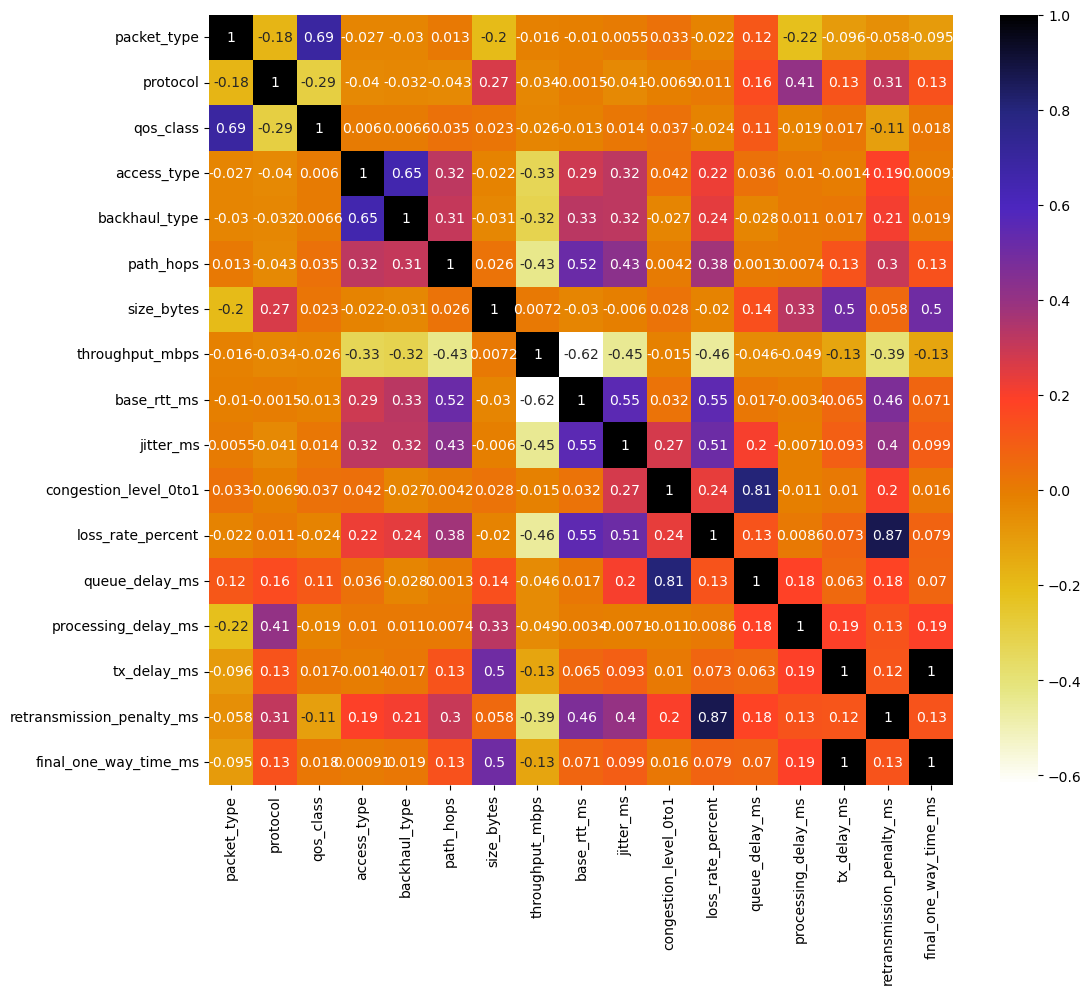

In [472]:
import seaborn as sns
import matplotlib.pyplot as plt  # correct import

plt.figure(figsize=(12, 10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()


In [474]:
def correlation(df, threshold):
    col_corr = set() #store unique
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: #remove abs for negative
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [476]:
corr_features = correlation(df, 0.8) #threshold
len(set(corr_features))

3

In [478]:
corr_features

{'final_one_way_time_ms', 'queue_delay_ms', 'retransmission_penalty_ms'}

In [480]:
df=df.drop("final_one_way_time_ms", axis=1)

In [482]:
target_col = df.columns[-1]  # last column (output)
cor_with_target = df.corr()[target_col].sort_values(ascending=False)

print(cor_with_target)

retransmission_penalty_ms    1.000000
loss_rate_percent            0.869926
base_rtt_ms                  0.463333
jitter_ms                    0.404201
protocol                     0.314393
path_hops                    0.300999
backhaul_type                0.210578
congestion_level_0to1        0.199378
access_type                  0.190188
queue_delay_ms               0.181002
processing_delay_ms          0.130257
tx_delay_ms                  0.124852
size_bytes                   0.057630
packet_type                 -0.058284
qos_class                   -0.107700
throughput_mbps             -0.392306
Name: retransmission_penalty_ms, dtype: float64


In [484]:
threshold = 0.05
low_corr = cor_with_target[abs(cor_with_target) < threshold].index
to_drop = list(low_corr)

In [486]:
to_drop

[]

## TRAIN AND TEST

In [489]:
from sklearn.model_selection import train_test_split

In [491]:
# Split into features (X) and target (y)
X = df.iloc[:, :-1]   # all columns except last
y = df.iloc[:, -1]    # only last column

In [493]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [495]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [496]:
X_train = scaler.fit_transform(X_train)  # fit on training data
X_test = scaler.transform(X_test)        # only transform test data

In [499]:
# See first 5 rows of scaled training data
print("Scaled X_train:\n", X_train[:5])

# See first 5 rows of scaled test data
print("\nScaled X_test:\n", X_test[:5])

Scaled X_train:
 [[-1.12850143 -1.423354   -0.77101014 -0.48909221 -0.83547443 -0.83877623
  -0.37108112 -0.86429209  0.67951036  0.01651559 -0.50408374  1.03616966
  -0.73070566 -0.36322971 -0.20301854]
 [-1.12850143 -1.423354   -0.77101014 -0.48909221 -0.83547443  0.62712764
  -0.37107766 -0.57415459  1.52394589  0.59642245  0.70835901 -0.08441659
  -0.48852033 -0.90453453 -0.20307058]
 [-0.35856868  0.70256591  0.43190316 -0.48909221 -0.83547443  0.33394686
   4.16692968 -0.7568854  -0.20068294 -0.18686121 -0.88476427 -0.44767473
  -0.58153628  1.61430739  3.63486631]
 [-1.5134678   0.70256591 -1.97392345  0.3639756  -0.83547443 -1.13195701
  -0.26466633  0.66229648 -0.8125213  -1.04189324 -0.60675526 -0.76843089
  -0.50387033  0.76047527 -0.19404724]
 [ 1.18129681 -1.423354    0.43190316 -0.48909221 -0.83547443  1.50666996
  -0.37108841 -0.53739727  0.22798713  3.1679681   2.82490548 -0.53505464
   4.76032959 -0.6835518  -0.20307543]]

Scaled X_test:
 [[-1.12850143e+00 -1.42335400e

In [500]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [501]:
regression=LinearRegression()

In [502]:
regression.fit(X_train,y_train)

LinearRegression()

In [507]:
print(regression.coef_)

[ 0.12084838  1.06662614 -0.12515824  0.05638769  0.05856918 -0.06643698
 -0.09664321  0.11270245  0.07104281 -0.13119981 -0.19782402  3.26452701
  0.24220826  0.00448794  0.15209732]


In [509]:
reg_pred = regression.predict(X_test)

In [511]:
print(mean_absolute_error(y_test,reg_pred))

1.0264233968682608
